In [1]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
from skimage.io import imread
from skimage.transform import pyramid_reduce, resize

import os, glob

In [2]:
img_list = sorted(glob.glob('2d_images_3/*.png'))
mask_list = sorted(glob.glob('2d_masks_3/*'))
print(len(img_list), len(mask_list))

833 1936


In [3]:
img_list[0][-13:-4]

'000000007'

In [4]:
IMG_SIZE = 256

x_data = np.empty((len(img_list), IMG_SIZE, IMG_SIZE, 3), dtype=np.float32)
for i, img_path in enumerate(img_list):
    img = imread(img_path)
#     print(img.shape)
    img = resize(img, output_shape=(IMG_SIZE, IMG_SIZE, 3), preserve_range=True)
#     print(img.shape)
    img /= 255
    x_data[i] = img


(833, 256, 256, 3)


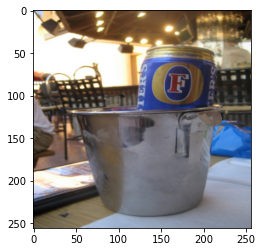

In [5]:
print(x_data.shape)
plt.imshow(x_data[0].squeeze())

### mask

In [6]:
# maskdic key
mask_dic = {}
for m in mask_list:
    title = m.split(".")[0].split("\\")[1]
    mask_dic[title] = []

In [7]:
# mask_dic value
for m in mask_list:
    title = m.split(".")[0].split("\\")[1]
    mask = m.split(".")[1]
    mask_dic[title].append(mask)

In [8]:
# y_data 이미지
y_data = np.empty((len(mask_list),IMG_SIZE, IMG_SIZE, 1), dtype=np.float32)
for i, img_path in enumerate(mask_list):
    img = imread(img_path)
#     print(img.shape)
    img = resize(img, output_shape=(IMG_SIZE, IMG_SIZE, 1), preserve_range = True)
#     print(img_path, img.shape)
    img /= 255
    y_data[i] = img

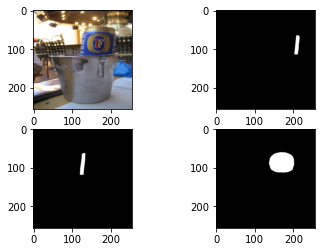

In [9]:
fig, ax = plt.subplots(2,2)
ax[0][0].imshow(x_data[0].squeeze(), cmap='gray')
ax[0][1].imshow(y_data[0].squeeze(), cmap='gray')
ax[1][0].imshow(y_data[1].squeeze(), cmap='gray')
ax[1][1].imshow(y_data[2].squeeze(), cmap='gray')

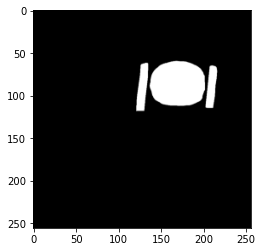

In [10]:
new_array = y_data[0]+y_data[1]+y_data[2]
new_array.shape
plt.imshow(new_array.squeeze(),cmap='gray')

In [11]:
# concatenate mask dataset
mask_data = np.empty((len(img_list), IMG_SIZE, IMG_SIZE, 1), dtype=np.float32)
print(mask_data.shape)

for i, key in enumerate(mask_dic.keys()):
#     print(i, key)
    for mask in mask_dic[key]:
        img = imread(f'2d_masks_3\{key}.{mask}.png')
        img = resize(img, output_shape=(IMG_SIZE, IMG_SIZE, 1), preserve_range = True)
        img /= 255
        mask_data[i] += img

(833, 256, 256, 1)


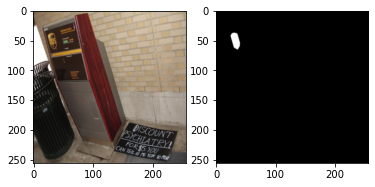

In [12]:
fig, ax = plt.subplots(1,2)
num = len(mask_data)-1
ax[0].imshow(x_data[num].squeeze(), cmap='gray')
ax[1].imshow(mask_data[num].squeeze(), cmap='gray')

In [13]:
print(x_data.shape)
print(mask_data.shape)
x_train, x_val, y_train, y_val = train_test_split(x_data, mask_data, test_size=0.1)
np.save('x_train.npy', x_train)
np.save('x_val.npy', x_val)
np.save('y_train.npy', y_train)
np.save('y_val.npy', y_val)

print(x_train.shape, y_train.shape)
print(x_val.shape, y_val.shape)

(833, 256, 256, 3)
(833, 256, 256, 1)
(749, 256, 256, 3) (749, 256, 256, 1)
(84, 256, 256, 3) (84, 256, 256, 1)
